In [101]:
import pandas as pd 

df_no_outliers_2009_12_2010 = pd.read_csv('df_no_outliers_2009_12_2010.csv')

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

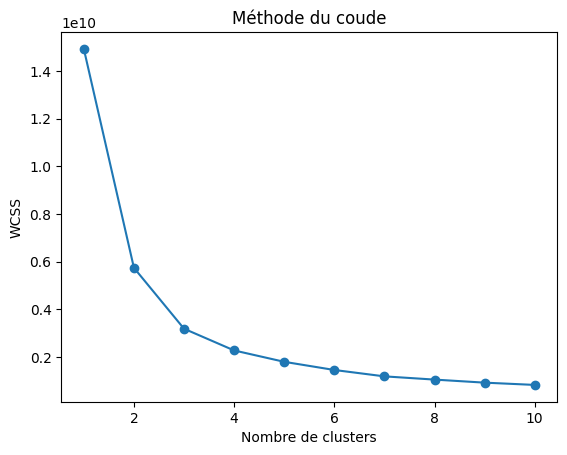

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


variables = ['nombre_commandes','montant_effectif','nombre_jours_depuis_derniere_commande','panier_moyen','pourcentage_annulation_montant']
# Préparer les données et effectuer la normalisation
X = df_no_outliers_2009_12_2010[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Liste pour stocker les valeurs des indices de performance (WCSS) pour différents nombres de clusters
wcss = []

# Définir une plage de valeurs pour le nombre de clusters à tester
range_clusters = range(1, 11)

# Appliquer K-means pour différents nombres de clusters et calculer l'indice de performance (WCSS)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la courbe de la méthode du coude
plt.plot(range_clusters, wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



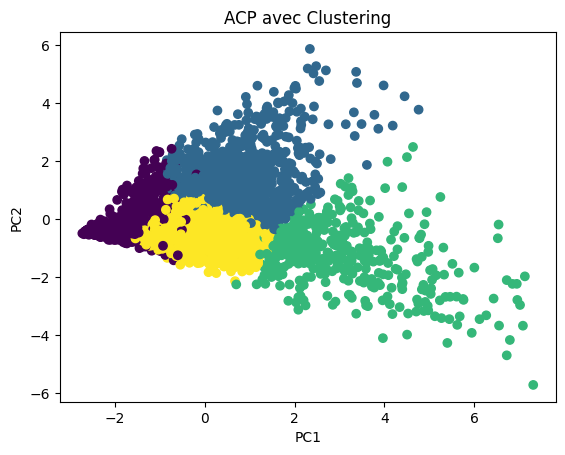

,nombre_commandes,montant_effectif,nombre_jours_depuis_derniere_commande,panier_moyen,pourcentage_annulation_montant
0,1.517986,384.794484,260.517986,305.205809,11.546329
1,2.932615,1208.614241,72.628032,1033.581620,58.236231
2,12.760000,5508.295129,25.978824,798.358469,37.120859
3,3.296643,914.906065,55.376445,349.911701,15.391696


In [122]:
import pandas as pd

df_names = [
    '2009_12_2010',
    '2009_01_2011',
    '2009_02_2011',
    '2009_03_2011',
    '2009_04_2011',
    '2009_05_2011',
    '2009_06_2011',
    '2009_07_2011',
    '2009_08_2011',
    '2009_09_2011',
    '2009_10_2011',
    '2009_11_2011',
    '2009_12_2011'
]

df_list_no_outliers = []

for df_name in df_names:
    df_no_outliers = pd.read_csv(f"df_no_outliers_{df_name}.csv")
    df_list_no_outliers.append(df_no_outliers)

# Now you have a list of DataFrames (df_list_no_outliers) containing the retrieved data from the CSV files.


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

variables = ['nombre_commandes','montant_effectif','nombre_jours_depuis_derniere_commande','panier_moyen','pourcentage_annulation_montant']
k = 4

# Définition de la fonction perform_segmentation
def perform_segmentation(df, variables, k):
    # Préparation des données et normalisation
    X = df[variables]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Application de l'algorithme K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Ajout des informations de segmentation au DataFrame d'origine
    df['Segment'] = kmeans.labels_

    # Analyse des caractéristiques des clusters
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    df_cluster_centers = pd.DataFrame(cluster_centers, columns=variables)

    pca = PCA()
    X = pca.fit_transform(X_scaled)

    # Affichage du scatter plot des composantes principales avec une couleur pour chaque cluster
    plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('ACP avec Clustering')
    plt.show()

    # Stockage des segments pour chaque client dans un dictionnaire
    segments_by_customer = {}
    for customer_id, segment in zip(df['numero_client'], df['Segment']):
        segments_by_customer.setdefault(customer_id, []).append(segment)

    return df_cluster_centers

perform_segmentation(df_no_outliers_2009_12_2010,variables,k)



In [142]:
df = pd.DataFrame(df_no_outliers_2009_12_2010.groupby('Segment').agg({'montant_effectif':'sum'}))

import plotly.express as px

# Créer le pie plot
fig = px.pie(df, values='montant_effectif', names=df.index, title='Répartition des montants effectifs par cluster')

# Afficher le graphique
fig.show()




/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



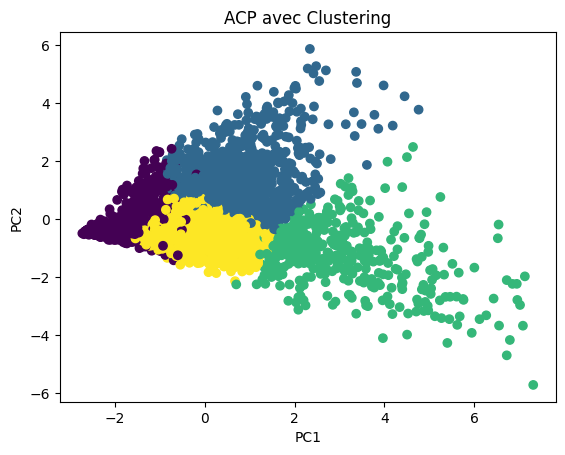

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



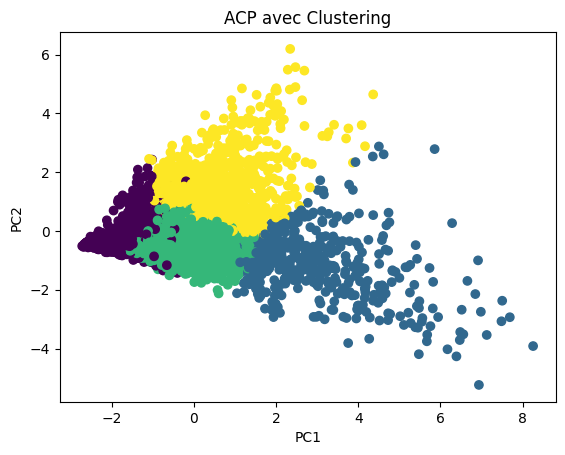

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



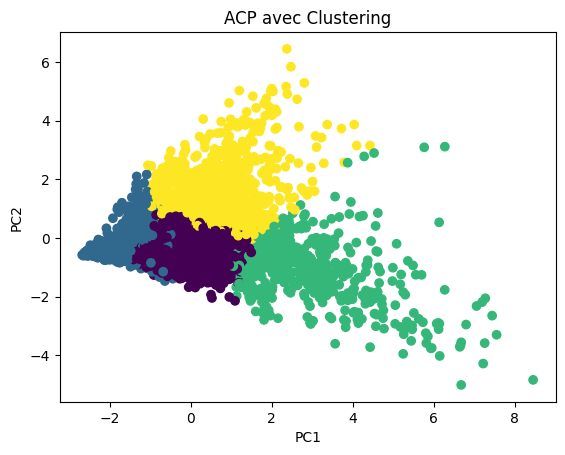

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



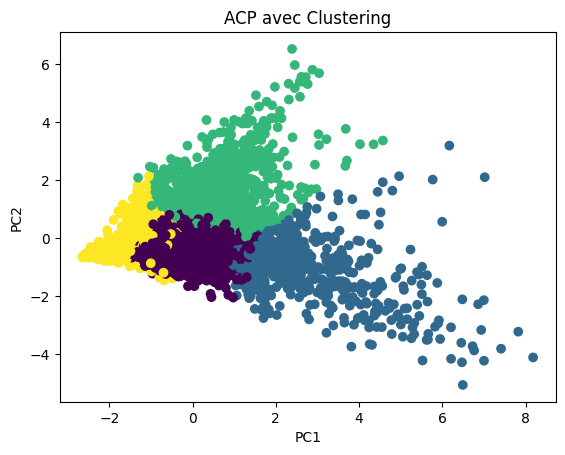

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



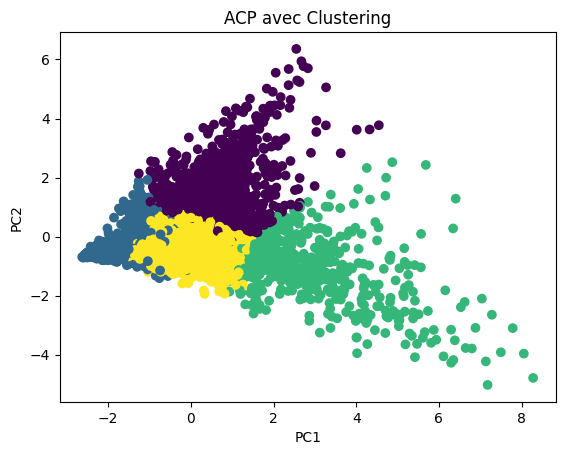

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



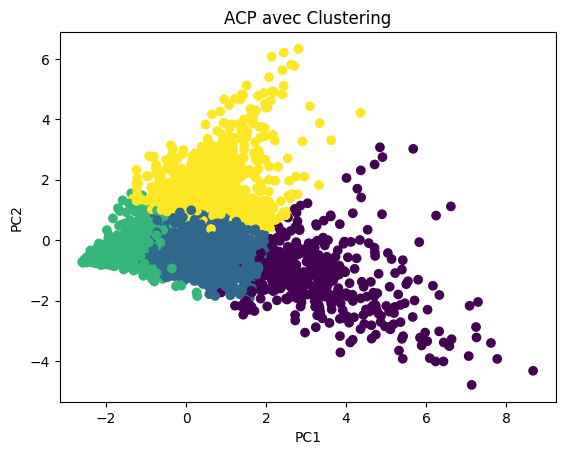

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



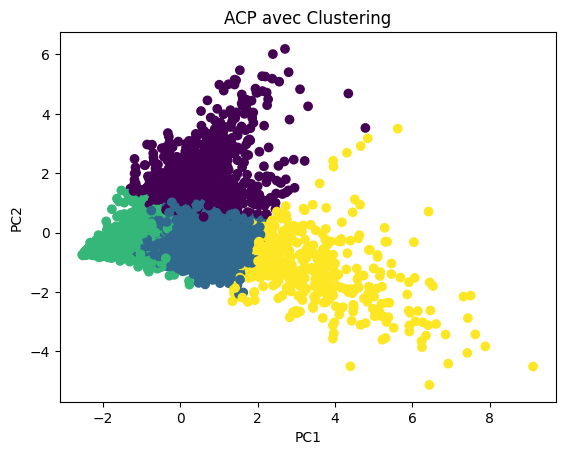

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



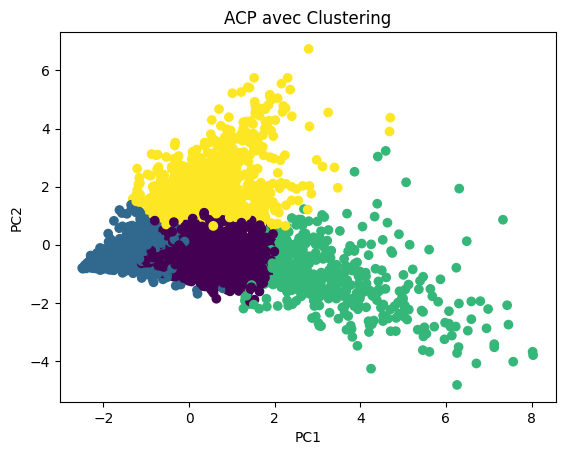

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



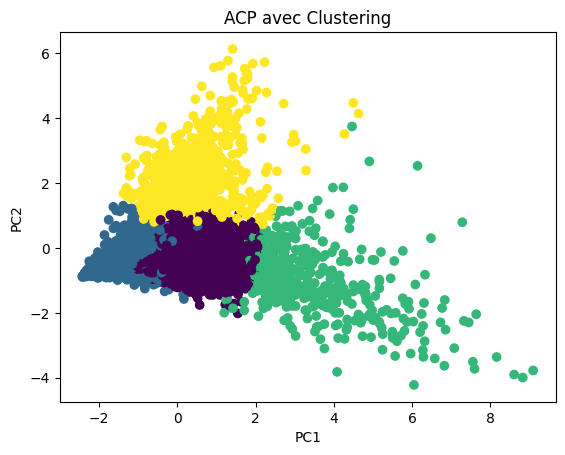

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



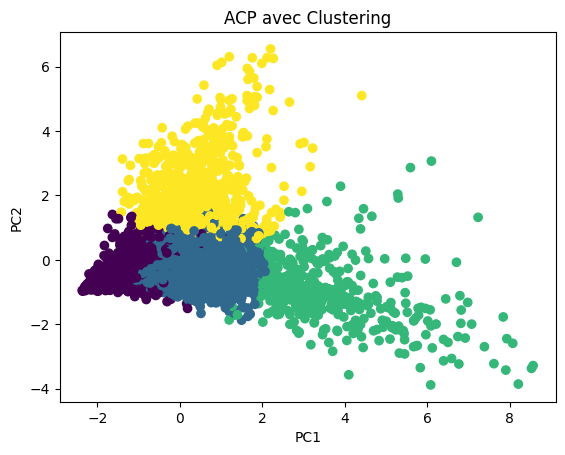

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



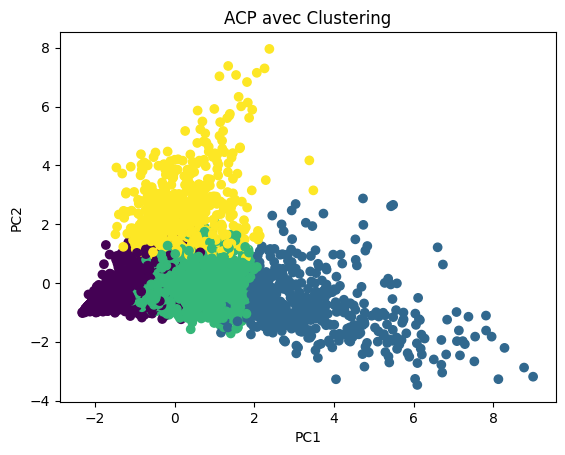

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



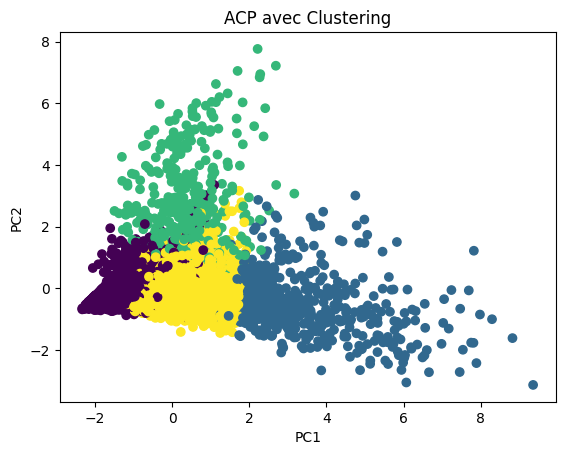

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



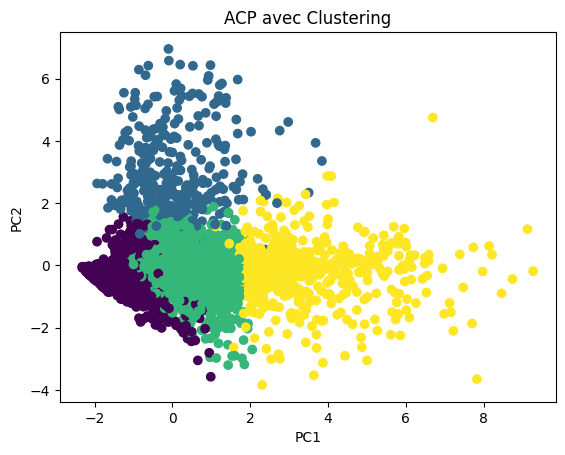

In [123]:
for df in df_list_no_outliers:
    perform_segmentation(df, variables, k)

In [124]:
import pandas as pd

# Supposons que vous ayez une liste de DataFrames

# Colonnes à conserver dans le DataFrame final
columns_to_keep = ["numero_client",'Segment']

# Fusionner les DataFrames en utilisant merge()
merged_df = df_list_no_outliers[0][columns_to_keep]
merged_df.rename(columns={"Segment": "Segment"}, inplace=True)  # Renommer la colonne du premier segment de référence

for i in range(1, len(df_list_no_outliers)):
    suffix = f" {i}"  # Suffixe personnalisé pour les colonnes
    df = df_list_no_outliers[i][["numero_client", "Segment"]]
    df.rename(columns={"Segment": f"Segment{suffix}"}, inplace=True)  # Renommer la colonne du segment actuel
    merged_df = pd.merge(merged_df, df, on="numero_client", how="left")

# Afficher le DataFrame fusionné
print(merged_df)





      numero_client  Segment  Segment 1  Segment 2  Segment 3  Segment 4  \
0           12347.0        1        3.0        3.0        2.0        0.0   
1           12348.0        1        2.0        0.0        0.0        3.0   
2           12349.0        1        3.0        3.0        2.0        0.0   
3           12351.0        3        2.0        0.0        0.0        3.0   
4           12352.0        1        3.0        3.0        0.0        3.0   
...             ...      ...        ...        ...        ...        ...   
4184        18283.0        1        3.0        3.0        2.0        0.0   
4185        18284.0        3        2.0        0.0        0.0        3.0   
4186        18285.0        0        0.0        1.0        3.0        1.0   
4187        18286.0        3        2.0        0.0        0.0        1.0   
4188        18287.0        1        3.0        3.0        2.0        0.0   

      Segment 5  Segment 6  Segment 7  Segment 8  Segment 9  Segment 10  \
0           

/tmp/ipykernel_53065/3621717712.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_53065/3621717712.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_53065/3621717712.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_53065/3621717712.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [125]:
from sklearn.metrics.cluster import adjusted_rand_score

# Obtenez le segment de référence à partir du DataFrame fusionné
initial_segment = "Segment"
initial_segment_list = merged_df[initial_segment].values.tolist()

# Boucle pour comparer chaque segment avec le segment de référence
for column in merged_df.columns:
    if column != "numero_client" and column != initial_segment:
        segment = merged_df[column].values.tolist()

        # Créer un masque pour filtrer les lignes avec des valeurs NaN dans les colonnes de segment
        mask = ~pd.isnull(segment)

        # Filtrer les listes segment et initial_segment_list
        segment_filtered = [segment[i] for i in range(len(segment)) if mask[i]]
        initial_segment_filtered = [initial_segment_list[i] for i in range(len(segment)) if mask[i]]

        ari = adjusted_rand_score(initial_segment_filtered, segment_filtered)
        print(f"ARI between {initial_segment} and {column}: {ari}")


ARI between Segment and Segment 1: 0.8563568791233832
ARI between Segment and Segment 2: 0.7316892353282559
ARI between Segment and Segment 3: 0.6041568960040136
ARI between Segment and Segment 4: 0.5256946506932412
ARI between Segment and Segment 5: 0.27809936575912153
ARI between Segment and Segment 6: 0.259967506365398
ARI between Segment and Segment 7: 0.2564115040097859
ARI between Segment and Segment 8: 0.25256784859793485
ARI between Segment and Segment 9: 0.2501881254014779
ARI between Segment and Segment 10: 0.24680555368001084
ARI between Segment and Segment 11: 0.2391012113554152
ARI between Segment and Segment 12: 0.22628693511791287


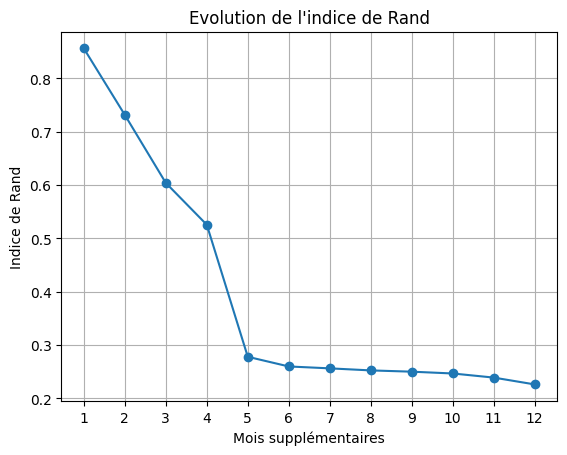

In [126]:
import matplotlib.pyplot as plt

# Liste pour stocker les valeurs d'ARI
ari_values = []

# Boucle pour calculer les ARI et les ajouter à la liste
for column in merged_df.columns:
    if column != "numero_client" and column != initial_segment:
        segment = merged_df[column].values.tolist()

        # Créer un masque pour filtrer les lignes avec des valeurs NaN dans les colonnes de segment
        mask = ~pd.isnull(segment)

        # Filtrer les listes segment et initial_segment_list
        segment_filtered = [segment[i] for i in range(len(segment)) if mask[i]]
        initial_segment_filtered = [initial_segment_list[i] for i in range(len(segment)) if mask[i]]

        ari = adjusted_rand_score(initial_segment_filtered, segment_filtered)
        ari_values.append(ari)

# Tracer le graphique
plt.plot(range(1, len(ari_values)+1), ari_values, marker='o')
plt.xlabel("Mois supplémentaires")
plt.ylabel("Indice de Rand")
plt.title("Evolution de l'indice de Rand")
plt.xticks(range(1, len(ari_values)+1))
plt.grid(True)
plt.show()


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



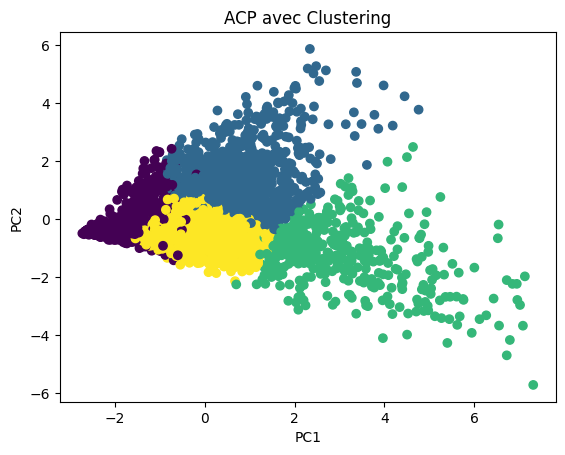

In [127]:
from sklearn.preprocessing import MinMaxScaler

df_cluster = perform_segmentation(df_no_outliers_2009_12_2010,variables,k)

scaler = MinMaxScaler(feature_range=(1,5))

df_scaled = scaler.fit_transform(df_cluster)
df_scaled = pd.DataFrame(df_scaled,columns=df_cluster.columns)
df_scaled['Cluster'] = ["0","1","2","3"]

In [128]:
import plotly.graph_objects as go
import pandas as pd

# Définir les variables pour le graphique en radar
variables = ['nombre_commandes','montant_effectif','nombre_jours_depuis_derniere_commande','panier_moyen','pourcentage_annulation_montant']

# Définir une liste de couleurs
colors = ['red', 'blue', 'green', 'orange']

# Créer un graphique en radar pour chaque ligne du DataFrame
for i, row in df_scaled.iterrows():
    cluster = row['Cluster']
    values = row[variables].tolist()

    # Créer un nouveau graphique en radar
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=variables,
        fill='toself',
        name=f'Cluster {cluster}',
        line=dict(color=colors[i % len(colors)])  # Utiliser une couleur différente pour chaque graphique
    ))

    # Configurer la mise en page du graphique en radar
    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True,
                            range=[0,5]),
        ),
        showlegend=True,
        title=f'Cluster {cluster}'
    )

    # Afficher le graphique
    fig.show()




In [114]:
import plotly.graph_objects as go
import pandas as pd

# Define variables for the radar chart
variables = ['nombre_commandes', 'montant_effectif', 'nombre_jours_depuis_derniere_commande', 'panier_moyen', 'pourcentage_annulation_montant']

# Define a list of colors
colors = ['red', 'blue', 'green', 'orange']

# Create a radar chart
fig = go.Figure()

# Iterate over each cluster
for i, cluster in enumerate(df_scaled['Cluster'].unique()):
    # Filter the data for the specific cluster
    cluster_data = df_scaled[df_scaled['Cluster'] == cluster]

    # Get the values for the specific cluster
    values = cluster_data[variables].iloc[0].tolist()

    # Add a trace for the specific cluster
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=variables,
        fill='toself',
        name=f'Cluster {cluster}',
        line_color=colors[i % len(colors)]  # Use a different color for each cluster
    ))

# Configure the layout of the radar chart
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True)
    ),
    showlegend=True,
    title='Graphique Radar des Clusters'
)

# Show the chart
fig.show()



Cluster 0:

Titre : "Clients réguliers à panier moyen élevé"
Description : Ce groupe de clients se distingue par un nombre modéré de commandes, un montant total élevé, une récence relativement récente, un panier moyen élevé et un faible pourcentage d'annulation de montant. Ces clients sont des acheteurs réguliers qui effectuent des achats fréquents avec des paniers de valeur élevée.

Cluster 1:

Titre : "Clients occasionnels à faible montant"
Description : Ce groupe de clients se caractérise par un nombre limité de commandes, un montant total faible, une récence relativement élevée, un panier moyen modéré et un faible pourcentage d'annulation de montant. Ces clients sont des acheteurs occasionnels qui effectuent des achats sporadiques avec des montants relativement faibles.

Cluster 2:

Titre : "Clients réguliers à faible montant"
Description : Ce groupe de clients se distingue par un nombre modéré de commandes, un montant total modéré, une récence relativement récente, un panier moyen modéré et un faible pourcentage d'annulation de montant. Ces clients sont des acheteurs réguliers qui effectuent des achats fréquents avec des montants plutôt faibles.

Cluster 3:

Titre : "Clients fidèles à panier moyen élevé"
Description : Ce groupe de clients se caractérise par un nombre élevé de commandes, un montant total élevé, une récence relativement récente, un panier moyen élevé et un pourcentage d'annulation de montant modéré. Ces clients sont des acheteurs fidèles qui effectuent des achats fréquents avec des paniers de valeur élevée.
Ces titres et descriptions sont basés sur les caractéristiques distinctives des clients dans chaque cluster, telles que le nombre de commandes, le montant total, la récence, le panier moyen et le pourcentage d'annulation de montant. Veuillez noter que ces suggestions sont basées sur une analyse générale des données et peuvent nécessiter une validation supplémentaire en fonction de votre contexte et de vos connaissances spécifiques sur les clients.

Cluster 0: "Clients réguliers à panier moyen élevé"

Mettez en place un programme de fidélité attrayant pour récompenser leur comportement d'achat régulier.
Proposez des offres exclusives et des promotions spéciales pour encourager les achats répétés.
Offrez une expérience client personnalisée et attentive pour renforcer leur engagement envers votre marque.
Mettez en avant des produits haut de gamme ou des collections spéciales qui correspondent à leurs préférences et à leur volonté de dépenser davantage.

Cluster 1: "Clients occasionnels à faible montant"

Envoyez des rappels personnalisés pour stimuler leur intérêt et les encourager à effectuer davantage d'achats.
Proposez des offres promotionnelles attractives pour les inciter à augmenter leur panier moyen.
Mettez en avant des produits abordables et des articles en promotion pour attirer leur attention.
Créez un programme de parrainage pour encourager ces clients à recommander votre marque à d'autres personnes.

Cluster 2: "Clients réguliers à faible montant"

Mettez en place des programmes de fidélité ou des récompenses spéciales pour encourager les achats répétés.
Proposez des bundles ou des offres groupées pour augmenter leur panier moyen tout en offrant une valeur ajoutée.
Envoyez des communications personnalisées pour les informer des nouveautés et des promotions adaptées à leurs préférences.
Faites preuve de créativité dans vos campagnes marketing pour les inciter à augmenter leurs dépenses tout en conservant leur fidélité.

Cluster 3: "Clients fidèles à panier moyen élevé"

Offrez un service client premium pour renforcer leur satisfaction et leur fidélité.
Proposez des produits ou des services haut de gamme pour répondre à leurs attentes élevées.
Mettez en place des programmes VIP ou des avantages exclusifs pour les récompenser de leur fidélité.
Personnalisez votre communication pour maintenir une relation étroite et continue avec ces clients précieux.